In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dv=pd.read_csv('house_price_regression_dataset.csv')
print(dv.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [3]:
print(dv.columns)

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')


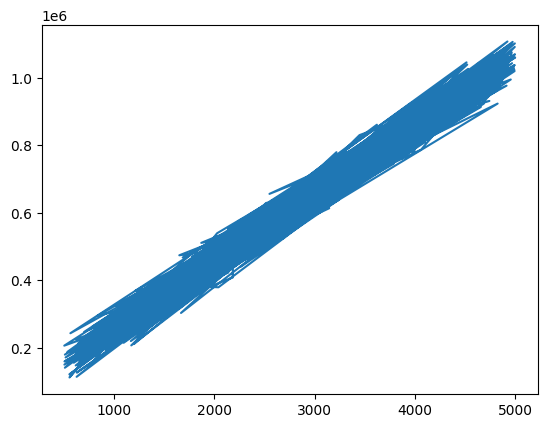

In [4]:
x=dv['Square_Footage']
y=dv['House_Price']
plt.plot(x,y)
plt.show()

100 100


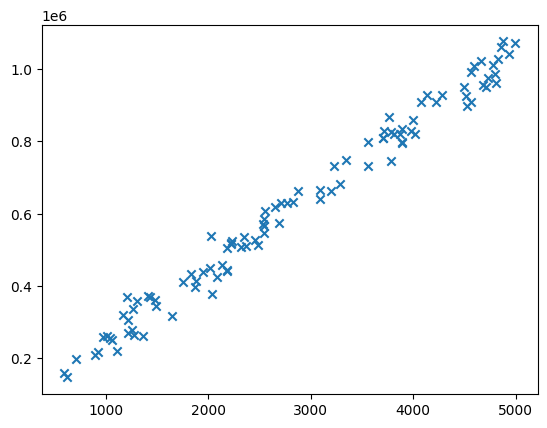

In [5]:
"""
lets put x as 'Square_Footage'
and y as 'House_Price'
now there are 1000 data sets we have taken just 100 points
"""
x_train=x[::10]
y_train=y[::10]
m=x_train.size
print(x_train.size,y_train.size)
plt.scatter(x_train,y_train,marker='x')
plt.show()

In [6]:
"""
these both lines of code below are just training and watching how the the line gives output

"""

'\nthese both lines of code below are just training and watching how the the line gives output\n\n'

In [7]:
def compute_model(w,b,x_train,m):
    return x_train*w+b

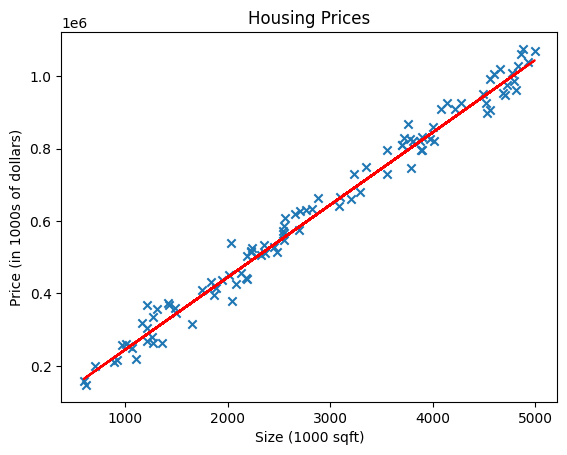

In [8]:
w=200
b=45000
y_wb=compute_model(w,b,x_train,m)
plt.plot(x_train,y_wb,'r')
plt.scatter(x_train,y_train,marker='x')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [9]:
"""
finding means square error so that our model returns least error

"""

'\nfinding means square error so that our model returns least error\n\n'

In [10]:
def compute_cost(x_train,y_train,w,b):
    m=x_train.shape[0]
    cost_sum=0
    J=np.zeros((len(w),len(b)))
    m=x_train.shape[0]
    for i,w_i in enumerate(w):
        for j,b_i in enumerate(b):
            f_wb=(w_i*x_train+b_i)
            J[i][j]=(1/(2*m)*np.sum((f_wb-y_train)**2))
    return J

In [11]:
w_range=(np.max(y_train)-np.min(y_train))/(np.max(x_train)-np.min(x_train))
w_range*=5
w=np.linspace(-w_range,w_range,100)
b=np.linspace(-np.max(y_train),np.max(y_train),100)
print(w.size , w.shape)
print(b.size, b.shape)
f_wb=compute_cost(x_train,y_train,w,b)
print(f_wb.size,f_wb.shape)

100 (100,)
100 (100,)
10000 (100, 100)


(100, 100) (100, 100)


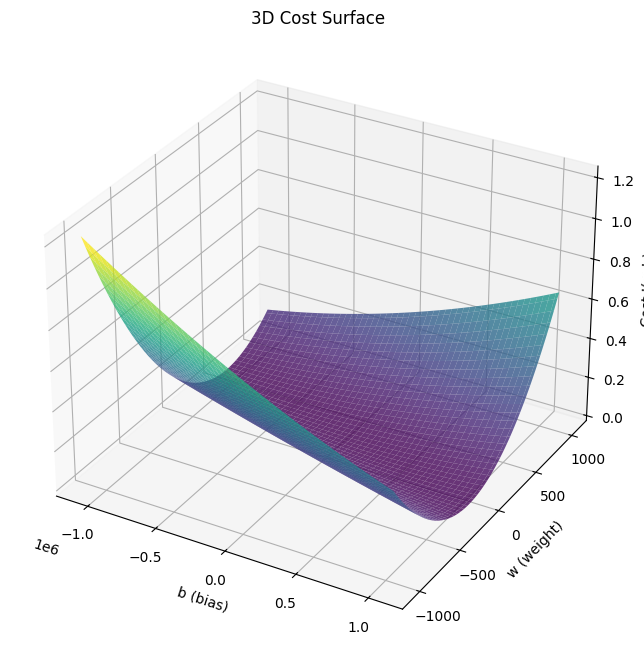

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
W, B = np.meshgrid(b, w)
print(W.shape,B.shape)
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(W,B,f_wb,cmap='viridis',alpha=0.8)
ax.set_xlabel('b (bias)')
ax.set_ylabel('w (weight)')
ax.set_zlabel('Cost J(w,b)')
ax.set_title('3D Cost Surface')
plt.show()

In [13]:
minVal=np.unravel_index(np.argmin(f_wb),f_wb.shape)
best_w=w[minVal[0]]
best_b=b[minVal[1]]
print("w : ",best_w)
print("b : ",best_b)

w :  202.42800283892439
b :  54334.062216204125


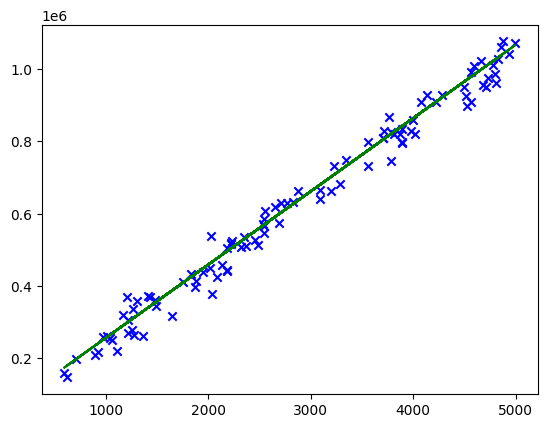

In [14]:
y_best=x_train*best_w+best_b
plt.scatter(x_train,y_train,marker='x',color='blue')
plt.plot(x_train,y_best,'green')
plt.show()

In [15]:
"""

MAKE PREDICTION LIKE PUT X ANYTHING IT WILL GIVE YOU PREDICTION ON IT

"""

'\n\nMAKE PREDICTION LIKE PUT X ANYTHING IT WILL GIVE YOU PREDICTION ON IT\n\n'

In [16]:
x=int(input("enter the sq.ft of house : "))
price_p=best_w*x+best_b
print(f"price of {x} sq.ft is $ {price_p}")

price of 4000 sq.ft is $ 864046.0735719017
